HW5
2a,b,c

Hamming Loss :
Hamming Loss is defined similar to how it was previously defined and previously obtained.
For example, consider the following :

Actual Classes in our labels, ordered set        (1,2,4) 
Predicted Classes in our labels, ordered set     (0,2,4)

Hamming Loss for this instance is 1/3

Thus hamming loss calculates the mismatch between the actual label class and the predicted label class

This will be averaged over all instances


Hamming Distance :
The definition of Hamming Distance in traditional binary sets will be used. Considering again, for an instance,
Actual (1,2,0)
Predicted (2,2,1)

The hamming distance is 2, as 2 mismatch occur, index-corresponding
Hamming Loss for this instance would be 2/3
Thus hamming distance calculates how many index corresponding class changes we would need to perform on the predicted vector of label-class, to obtain the actual vector of label-class



Hamming Score :
Accuracy score or hamming score is the same, as referenced in Godbole. 

Hamming Score (for an instance) = True Prediction / All Predictions (counted in a correct way) = intersection / union

Obviously defining this for multi-label, multi-class case is relatively conflicting

Consider : 
Actual (1,2,4,0,9)
Predicted (0,2,4,1,8)

Obviously, here, everything is indexed.
True predictions are 2,4 = 2
All predictions are 0,1,2,4,8 = 5
So Hamming Score here = 2/5

Also Consider :
Actual (1,1,0,2,3)           
Predicted (1,2,0,1,3)        

True Prediction are 1,0,3 = 3          (for us, index matters)
All Prediction are 1,2,0,3 (distinct, repetitions not allowed) = 4


In general hamming score = true predictions / all distinct predictions (ignoring class differences of different labels) = 3/4 here

Thus even though class 1 in label 1 and class 1 of label 5 correspond to entirely different entities altogether, we consider them same in calculating the Hamming Score (based on references I've come across)

Thus hamming score calculates how distinct predictions are from the original set.

Hamming score has numerator which is the same as that in Hamming Loss, however hamming loss has denominator that counts all the indices over which comparison was done, whereas hamming score evaluates for its denominator the collection of distinct (neglect label-class difference) classes in the entire two sets, actual and the predicted.


OVER ALL Instances, calculation done by averaging over each instance.

For Hamming Loss this is just = (total mismatch, stacked label-class)/(total such stacked entities)

Hamming distance = total mismatches / total instances

Hamming score = average(Hamming Score for each instance)

HS for each instance = total mismatch over an instance / all distinct classes in both the sets (actual,predicted) over an instance

Thus Hamming Loss and Distance will be cumulatively obtained, Hamming score will be individually obtained over each instance, and then averaged

HL and HD can also be obtained like HS, but they'll be the same as the cumulative entity due to the denominator being same over each instance. For HS multiple alternate definitions based on interpretation are possible, but here we go with this one.

In [21]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import calinski_harabasz_score
from sklearn.metrics import silhouette_score

train = pd.read_csv('Train_Data.csv',index_col = 0)
test = pd.read_csv('Test_Data.csv',index_col = 0)
print(train)
print(test)

      MFCCs_ 1  MFCCs_ 2  MFCCs_ 3  MFCCs_ 4  MFCCs_ 5  MFCCs_ 6  MFCCs_ 7  \
0          1.0  0.464912  0.409357  0.229967  0.043024  0.110648  0.041558   
1          1.0  0.550581  0.416760  0.199992  0.029394  0.152047  0.088736   
2          1.0  0.305720  0.161712  0.521877  0.148562 -0.035945 -0.138314   
3          1.0  0.085629  0.194640  0.558177  0.288138  0.013115 -0.084558   
4          1.0  0.157831  0.220788  0.662399  0.255485 -0.011588 -0.164573   
...        ...       ...       ...       ...       ...       ...       ...   
5031       1.0  0.948185  0.937043  0.430321  0.102723  0.398668 -0.067899   
5032       1.0  0.324665  0.231543  0.658007  0.202736 -0.012427 -0.089231   
5033       1.0  0.374609  0.134837  0.317741  0.105642  0.075624  0.158739   
5034       1.0  0.782845  0.885191  0.356826 -0.067459  0.240009  0.098551   
5035       1.0  0.044293  0.377297  0.421066  0.177453  0.209028  0.079516   

      MFCCs_ 8  MFCCs_ 9  MFCCs_10  ...  MFCCs_16  MFCCs_17  MF

In [22]:
whole = pd.concat([train,test],axis=0)
whole.reset_index(drop=True,inplace=True)

In [23]:
print(whole)

      MFCCs_ 1  MFCCs_ 2  MFCCs_ 3  MFCCs_ 4  MFCCs_ 5  MFCCs_ 6  MFCCs_ 7  \
0          1.0  0.464912  0.409357  0.229967  0.043024  0.110648  0.041558   
1          1.0  0.550581  0.416760  0.199992  0.029394  0.152047  0.088736   
2          1.0  0.305720  0.161712  0.521877  0.148562 -0.035945 -0.138314   
3          1.0  0.085629  0.194640  0.558177  0.288138  0.013115 -0.084558   
4          1.0  0.157831  0.220788  0.662399  0.255485 -0.011588 -0.164573   
...        ...       ...       ...       ...       ...       ...       ...   
7190       1.0  0.403517  0.251328  0.555090  0.202856 -0.060089 -0.147158   
7191       1.0 -0.117778  0.117083  0.333777  0.383093  0.179308 -0.149329   
7192       1.0  0.184261  0.325371  0.315440  0.125807  0.176992  0.131400   
7193       1.0  0.176501 -0.118110  0.262950  0.242768  0.071629 -0.050304   
7194       1.0 -0.350154 -0.378308 -0.025907  0.006280  0.169734  0.275162   

      MFCCs_ 8  MFCCs_ 9  MFCCs_10  ...  MFCCs_16  MFCCs_17  MF

In [24]:
features = whole.drop(columns=['Family','Genus','Species'])
label_class = whole.iloc[:,[22,23,24]]
print(features)
print(label_class)

      MFCCs_ 1  MFCCs_ 2  MFCCs_ 3  MFCCs_ 4  MFCCs_ 5  MFCCs_ 6  MFCCs_ 7  \
0          1.0  0.464912  0.409357  0.229967  0.043024  0.110648  0.041558   
1          1.0  0.550581  0.416760  0.199992  0.029394  0.152047  0.088736   
2          1.0  0.305720  0.161712  0.521877  0.148562 -0.035945 -0.138314   
3          1.0  0.085629  0.194640  0.558177  0.288138  0.013115 -0.084558   
4          1.0  0.157831  0.220788  0.662399  0.255485 -0.011588 -0.164573   
...        ...       ...       ...       ...       ...       ...       ...   
7190       1.0  0.403517  0.251328  0.555090  0.202856 -0.060089 -0.147158   
7191       1.0 -0.117778  0.117083  0.333777  0.383093  0.179308 -0.149329   
7192       1.0  0.184261  0.325371  0.315440  0.125807  0.176992  0.131400   
7193       1.0  0.176501 -0.118110  0.262950  0.242768  0.071629 -0.050304   
7194       1.0 -0.350154 -0.378308 -0.025907  0.006280  0.169734  0.275162   

      MFCCs_ 8  MFCCs_ 9  MFCCs_10  ...  MFCCs_13  MFCCs_14  MF

In [28]:
sil = pd.DataFrame(index=np.arange(2,51),columns=['Silhouette_Score_Average'])
for i in np.arange(2,51):
    kmeans = KMeans(n_clusters=i).fit(features)
    pred_clusters = kmeans.labels_
    sil.iloc[i-2] = silhouette_score(features,pred_clusters)
    
print(sil)

   Silhouette_Score_Average
2                  0.348678
3                  0.367693
4                  0.378751
5                  0.371483
6                  0.264167
7                  0.270377
8                  0.270145
9                   0.27643
10                 0.262267
11                 0.263254
12                 0.271299
13                 0.278209
14                 0.284318
15                  0.28873
16                 0.292127
17                  0.25944
18                 0.278927
19                 0.267219
20                 0.265294
21                 0.268966
22                 0.270865
23                 0.272566
24                 0.263479
25                 0.269879
26                 0.279878
27                 0.262981
28                 0.260371
29                 0.260552
30                 0.261116
31                  0.26571
32                 0.263449
33                 0.253012
34                 0.259099
35                 0.262902
36                 0

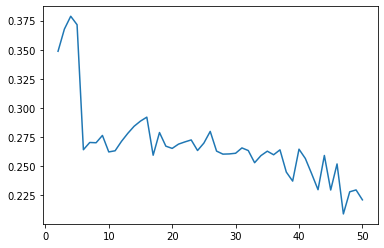

In [30]:
# Remove this for Monte Carlo

import matplotlib.pyplot as plt

plt.plot(np.arange(2,51),sil['Silhouette_Score_Average'])

In [34]:
# Picking the k with largest silhouette score

max_sil = sil.max(axis=0)
max_indx = np.argmax(sil['Silhouette_Score_Average'].to_numpy().flatten())
k_selected = max_indx + 2
print(k_selected)
print(max_sil)

4
Silhouette_Score_Average    0.378751
dtype: float64


In [35]:
# Clustering using this ideal k, selected via silhouette

kmeans = KMeans(n_clusters = k_selected).fit(features)
cluster_groups = kmeans.labels_
print(cluster_groups)

[0 0 1 ... 0 3 3]


In [36]:
cluster_triplet_df = pd.DataFrame(index = np.arange(0,k_selected),columns=['Fam_Clus','Gen_Clus','Spec_Clus']) # has cluster label details
for q in np.arange(0,k_selected):
    for l in np.arange(0,3):
        loc_build = []
        for p in np.arange(0,features.shape[0]):
            if cluster_groups[p] == q:
                loc_build.append(label_class.iloc[p,l])
        
        build = np.array(loc_build)
        build_counts = np.bincount(build)
        highest_freq = np.argmax(build_counts)
        cluster_triplet_df.iloc[q,l] = highest_freq


print(cluster_triplet_df)

  Fam_Clus Gen_Clus Spec_Clus
0        2        3         5
1        3        0         1
2        2        3         4
3        1        1         2


In [40]:
# cluster_triplet_df contains triplet of class, corresponding to the corresponding label

cluster_predictions_label_class = pd.DataFrame(index = np.arange(0,features.shape[0]),columns = ['Family','Genus','Species'])

for i in np.arange(0,features.shape[0]):
    cluster_predictions_label_class.iloc[i,0] = cluster_triplet_df.iloc[cluster_groups[i],0]
    cluster_predictions_label_class.iloc[i,1] = cluster_triplet_df.iloc[cluster_groups[i],1]
    cluster_predictions_label_class.iloc[i,2] = cluster_triplet_df.iloc[cluster_groups[i],2]
    
print(cluster_predictions_label_class)

     Family Genus Species
0         2     3       5
1         2     3       5
2         3     0       1
3         3     0       1
4         3     0       1
...     ...   ...     ...
7190      3     0       1
7191      1     1       2
7192      2     3       5
7193      1     1       2
7194      1     1       2

[7195 rows x 3 columns]


In [41]:
# cluster_predictions_label_class has the required classification, as performed by clustering the data first
# now the metrics will be evaluated

# Hamming Loss and Hamming Distance

mis = 0
for i in np.arange(0,features.shape[0]):
    for j in np.arange(0,3):
        if cluster_predictions_label_class.iloc[i,j] != label_class.iloc[i,j]:
            mis = mis + 1
        
    
hamming_loss = (mis/(3*features.shape[0]))*100

hamming_distance = mis/features.shape[0]

print('Hamming Loss is : \n',hamming_loss,'%')

print('Hamming Distance is, in terms of average misclassifications per instance, : \n',hamming_distance)    

Hamming Loss is : 
 22.24229789205467 %
Hamming Distance is, in terms of average misclassifications per instance, : 
 0.66726893676164


As can be seen the HL is 22 % (avg misclassification percentage)
HD is 0.67, thus every instance there will be 0.67 misclassifications or every 3 instances there will approximately be 2 misclassified labels (same or different labels)

This HL is high, as clusters are small and thus no matter what, all the label-class combinations can't be represented by these clusters (clusters <<< those label-class combinations)

In [54]:
# Hamming Score (true/total distinct)

hs = 0
for i in np.arange(0,features.shape[0]):
    
    sam_loc = 0
    for j in np.arange(0,3):
        
        if cluster_predictions_label_class.iloc[i,j] == label_class.iloc[i,j]:  # note the equality here, true calculated
            sam_loc = sam_loc + 1
    
    pred_loc = cluster_predictions_label_class.iloc[i,:].to_numpy().flatten()
    true_loc = label_class.iloc[i,:].to_numpy().flatten()
    
    uni_rep_strng = np.concatenate((pred_loc,true_loc)).flatten()  # union, absolute, with repetitions
    
    uni_bin = np.bincount(uni_rep_strng.astype(int))
    
    for m in np.arange(0,uni_bin.size):
        if uni_bin[m] > 1:
            uni_bin[m] = 1
    
    dist_cnt = np.sum(uni_bin)    # count of total distinct elements
    
    hs_loc = sam_loc/dist_cnt
    
    hs = hs + hs_loc          # running sum of HS
    

hamming_score = (hs/features.shape[0])*100

print('The hamming score (accuracy score) obtained is : \n',hamming_score,'%')

The hamming score (accuracy score) obtained is : 
 80.62080148251074 %


NOTE :
This was all done for once, we'll perform these tasks 50 times in the next portion
This was just to see if my code worked properly or not before iterating 50 times